# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
btc = requests.get(btc_url, headers={'Accept': 'application/json'})
print(btc)

<Response [200]>


In [7]:
# Show BTC data
btc_data = btc.json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18496356,
   'total_supply': 18496356,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 10511.14,
     'volume_24h': 23931620915,
     'market_cap': 194779245610,
     'percentage_change_1h': 0.0796917558598485,
     'percentage_change_24h': -3.17118385932138,
     'percentage_change_7d': 1.76469906568856,
     'percent_change_1h': 0.0796917558598485,
     'percent_change_24h': -3.17118385932138,
     'percent_change_7d': 1.76469906568856}},
   'last_updated': 1600726177}},
 'metadata': {'timestamp': 1600726177,
  'num_cryptocurrencies': 1460,
  'error': None}}

In [8]:
# Assign variables to BTC data
btc_name = btc.json()['data']['1']['name']
btc_price = btc.json()['data']['1']['quotes']['USD']['price']
btc_description = btc.json()['data']['1']['quotes']['USD']
btc_description

{'price': 10511.14,
 'volume_24h': 23931620915,
 'market_cap': 194779245610,
 'percentage_change_1h': 0.0796917558598485,
 'percentage_change_24h': -3.17118385932138,
 'percentage_change_7d': 1.76469906568856,
 'percent_change_1h': 0.0796917558598485,
 'percent_change_24h': -3.17118385932138,
 'percent_change_7d': 1.76469906568856}

In [9]:
print(f'1 {btc_name} is worth {btc_price}.')

1 Bitcoin is worth 10511.14.


In [10]:
# Fetch current ETH price
# YOUR CODE HERE!
eth = requests.get(eth_url, headers={'Accept': 'application/json'})
print(eth)

<Response [200]>


In [11]:
# Show ETH data
eth_data = eth.json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 112699131,
   'total_supply': 112699131,
   'max_supply': 0,
   'quotes': {'USD': {'price': 348.29,
     'volume_24h': 13010982310,
     'market_cap': 39340475623,
     'percentage_change_1h': 0.221644474584871,
     'percentage_change_24h': -5.72510674404226,
     'percentage_change_7d': -4.75889876772829,
     'percent_change_1h': 0.221644474584871,
     'percent_change_24h': -5.72510674404226,
     'percent_change_7d': -4.75889876772829}},
   'last_updated': 1600726142}},
 'metadata': {'timestamp': 1600726142,
  'num_cryptocurrencies': 1460,
  'error': None}}

In [12]:
# Assign variables to ETH data
eth_name = eth.json()['data']['1027']['name']
eth_price = eth.json()['data']['1027']['quotes']['USD']['price']
eth_description = eth.json()['data']['1027']
btc_description

{'price': 10511.14,
 'volume_24h': 23931620915,
 'market_cap': 194779245610,
 'percentage_change_1h': 0.0796917558598485,
 'percentage_change_24h': -3.17118385932138,
 'percentage_change_7d': 1.76469906568856,
 'percent_change_1h': 0.0796917558598485,
 'percent_change_24h': -3.17118385932138,
 'percent_change_7d': 1.76469906568856}

In [13]:
print(f'1 {eth_name} is worth {eth_price}.')

1 Ethereum is worth 348.29.


In [14]:
#response_content = btc_value.content()
#btc_data = btc_value.json()
#print(json.dumps(btc_data, indent=4))

In [15]:
# Compute current value of my crpto
# YOUR CODE 'HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
print(f'Total Value of my {my_btc} {btc_name} is ${my_btc_value:0.2f} dollars.')
print(f'Total Value of my {my_eth} {eth_name} is ${my_eth_value:0.2f} dollars.')
print(f'Total Value of my portfolio is ${my_btc_value + my_eth_value:0.2f} dollars.')

Total Value of my 1.2 Bitcoin is $12613.37 dollars.
Total Value of my 5.3 Ethereum is $1845.94 dollars.
Total Value of my portfolio is $14459.30 dollars.


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [17]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [18]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-09-15', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df = api.get_barset(
    tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Display sample data
df.head()

AGG                                        \
                             open     high       low    close    volume   
2019-01-02 00:00:00-05:00  106.55  106.610  106.4701  106.585  10164756   
2019-01-03 00:00:00-05:00  106.57  107.075  106.5700  107.020   6260265   
2019-01-04 00:00:00-05:00  106.66  106.720  106.5500  106.695   7755476   
2019-01-07 00:00:00-05:00  106.72  106.790  106.4600  106.470   6545877   
2019-01-08 00:00:00-05:00  106.40  106.530  105.5300  106.420   3818241   

                              SPY                                     
                             open    high     low   close     volume  
2019-01-02 00:00:00-05:00  245.98  251.21  245.95  249.89  107236613  
2019-01-03 00:00:00-05:00  248.23  248.57  244.03  244.46  113782919  
2019-01-04 00:00:00-05:00  247.59  253.11  247.17  252.41  122528832  
2019-01-07 00:00:00-05:00  252.69  255.95  251.69  254.40   88317608  
2019-01-08 00:00:00-05:00  256.82  257.31  254.00  256.65   88864452

In [19]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_close = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [20]:
#print(f"Current AGG closing price: ${agg_close_price}")
#print(f"Current SPY closing price: ${spy_close_price}")

In [21]:
# Print AGG and SPY close prices
df_close.head()

,AGG,SPY
,close,close
2019-01-02 00:00:00-05:00,106.585,249.89
2019-01-03 00:00:00-05:00,107.020,244.46
2019-01-04 00:00:00-05:00,106.695,252.41
2019-01-07 00:00:00-05:00,106.470,254.40
2019-01-08 00:00:00-05:00,106.420,256.65


In [22]:
# Compute the current value of shares
# YOUR CODE HERE!
spy_last = df_close['SPY']['close'][-1]
agg_last = df_close['AGG']['close'][-1]
my_spy_value = my_spy * spy_last
my_agg_value = my_agg * agg_last

In [23]:
# Print current value of share
print(f'Total value of my {my_spy} SPY shares is ${my_spy_value:0.2f}')
print(f'Total value of my {my_agg} AGG shares is ${my_agg_value:0.2f}')
print(f'Total value of my portfolio is ${my_spy_value + my_agg_value:0.2f}')

Total value of my 50 SPY shares is $17007.50
Total value of my 200 AGG shares is $23676.00
Total value of my portfolio is $40683.50


### Savings Health Analysis

In [24]:
# Create savings DataFrame
# YOUR CODE HERE!
savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value 
#btc_proportion = my_btc_value / df_savings
#eth_proportion = my_eth_value / df_savings
#spy_proportion = my_spy_value / df_savings
#agg_proportion = my_agg_value / df_savings

# Display savings DataFrame
print(f'Total amount of savings are worth ${savings:0.2f} for each union member.')

Total amount of savings are worth $55142.81 for each union member.


In [25]:
#df_savings = {'Crypto Assets': [f'{my_btc_value+my_eth_value:0.2f}'], 'Shares': [ f'{my_spy_value+my_agg_value:0.2f}']}
#df = pd.DataFrame(data=df_savings)

df_savings = pd.DataFrame({'': ['BTC', 'ETH', 'SPY', 'AGG'],'# of Shares': [my_btc, my_eth, my_spy, my_agg],'Value': [my_btc_value, my_eth_value, my_spy_value, my_agg_value]}, index=['BTC', 'ETH', 'SPY', 'AGG'])
df_savings.set_index('')

,# of Shares,Value
,,
BTC,1.2,12613.368
ETH,5.3,1845.937
SPY,50.0,17007.500
AGG,200.0,23676.000


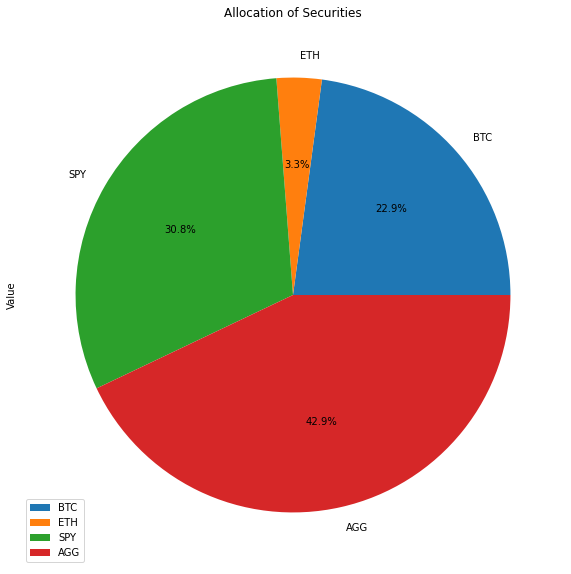

In [26]:
df_savings.plot.pie(y='Value', figsize=(10, 10), title='Allocation of Securities', autopct='%1.1f%%');

In [27]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings_plot = pd.DataFrame({'': ['Crypto Assets', 'Shares'], 'Amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}, index=['Crypto Assets', 'Shares'])
df_savings_plot.set_index('')

,Amount
,
Crypto Assets,14459.305
Shares,40683.500


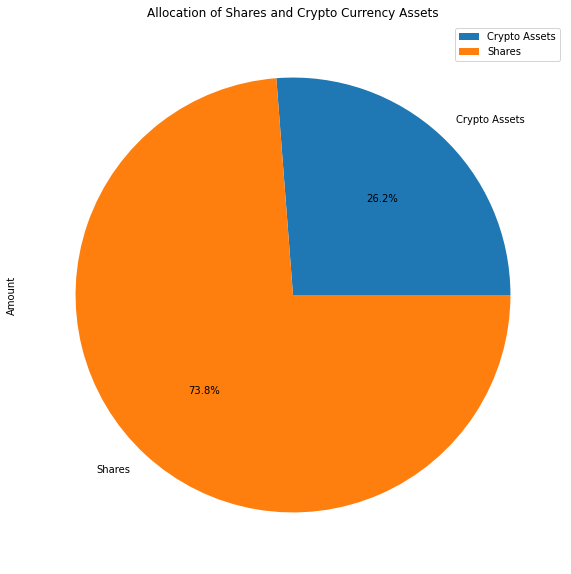

In [28]:
df_savings_plot.plot.pie(y='Amount', figsize=(10, 10), title='Allocation of Shares and Crypto Currency Assets', autopct='%1.1f%%');

In [29]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
total_savings = my_spy_value + my_agg_value + my_btc_value + my_eth_value

print(f'Emergency fund is equal to ${emergency_fund}.')
print(f'Your total savings are equal to ${total_savings}.')
# Calculate total amount of savings
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print('Congratulations! You have enough money to afford an emergency fund.')
else:
    print(f'Unfortunately you can not afford an emergency fund... You need ${emergency_fund - total_savings} more to afford an emergency fund.')
# Validate saving health
# YOUR CODE HERE!

Emergency fund is equal to $36000.
Your total savings are equal to $55142.805.
Congratulations! You have enough money to afford an emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [30]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('1990-09-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-09-20', tz='America/New_York').isoformat()

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG", "SPY"]
timeframe = "1D"
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
df_stock_data.index = df_stock_data.index.date
df_stock_close = df_stock_data.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)
# Display sample data
df_stock_close.head()

,AGG,SPY
,close,close
2008-01-02,101.65,144.55
2008-01-03,101.72,144.46
2008-01-04,102.12,140.93
2008-01-07,102.26,141.46
2008-01-08,102.51,138.81


In [32]:
# Calculate daily returns
df_stock_daily = df_stock_close.pct_change().dropna()
df_stock_daily

,AGG,SPY
,close,close
2008-01-03,0.000689,-0.000623
2008-01-04,0.003932,-0.024436
2008-01-07,0.001371,0.003761
2008-01-08,0.002445,-0.018733
2008-01-09,-0.002927,0.014192
...,...,...
2020-09-14,0.000084,0.012991
2020-09-15,0.000084,0.005112
2020-09-16,-0.000507,-0.003939


In [33]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252*30
)

In [34]:
# Printing the simulation input data
# YOUR CODE HERE!
#MC_30year.portfolio_data.head()
MC_30year_close = MC_30year.portfolio_data.drop(columns=['open', 'high', 'low', 'volume'], level=1).dropna()
MC_30year_close.head()

AGG                  SPY             
             close daily_return   close daily_return
2008-01-03  101.72     0.000689  144.46    -0.000623
2008-01-04  102.12     0.003932  140.93    -0.024436
2008-01-07  102.26     0.001371  141.46     0.003761
2008-01-08  102.51     0.002445  138.81    -0.018733
2008-01-09  102.21    -0.002927  140.78     0.014192

In [35]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016100,1.008569,1.001204,0.980932,1.008755,0.991903,0.993601,0.998180,0.984849,1.000703,...,1.008958,1.011482,1.002730,1.001591,1.012270,0.998077,1.002390,0.998336,1.005342,0.996797
2,1.011634,0.996777,1.006448,0.969221,1.000090,0.993189,0.996578,0.996079,0.986722,0.995924,...,1.006501,1.025251,1.015591,1.004987,1.006448,0.996147,1.003883,1.000367,1.017407,1.002533
3,1.012772,0.997066,0.996842,0.970169,1.013397,0.997317,0.988065,0.992804,0.988574,0.989613,...,1.002663,1.024403,1.017197,1.002412,1.004612,1.013466,1.008069,0.996920,1.006640,0.993919
4,1.021887,0.995790,0.993891,0.974589,1.011521,0.988895,0.981171,0.994475,0.994369,0.986600,...,1.000864,1.021651,1.027641,0.998583,1.011497,1.011357,1.012551,1.006988,0.999115,0.989618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.926308,6.341228,2.077893,11.309459,2.535691,9.211577,6.231645,2.515841,1.228259,1.046004,...,5.158692,3.158435,2.772619,5.264769,3.173271,1.413826,4.482966,15.854276,2.090196,11.896341
7557,4.945268,6.406330,2.081050,11.341188,2.509730,9.196343,6.226622,2.533966,1.224786,1.047370,...,5.131993,3.114289,2.782607,5.294273,3.125906,1.424840,4.506306,15.837877,2.061219,11.857222
7558,4.928253,6.378085,2.104731,11.313353,2.512230,9.139112,6.201361,2.543643,1.233386,1.047020,...,5.105811,3.148843,2.791257,5.341662,3.136568,1.418726,4.496028,16.052675,2.049938,11.815359
7559,5.001308,6.400244,2.126920,11.417075,2.508471,9.128307,6.158713,2.564911,1.223504,1.050308,...,5.112683,3.169960,2.782417,5.397167,3.168562,1.397111,4.470209,15.852823,2.097358,11.891360


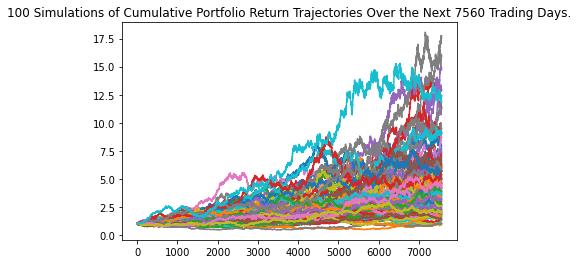

In [36]:
# Plot simulation outcomes
# YOUR CODE HERE!
simulation_plot = MC_30year.plot_simulation();

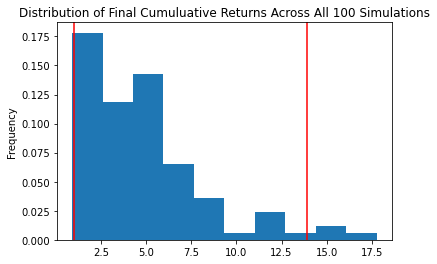

In [37]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
plot_dist_int = MC_30year.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_30 = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl_30)

count           100.000000
mean              4.867106
std               3.358244
min               0.918645
25%               2.309703
50%               4.274330
75%               6.011664
max              17.754884
95% CI Lower      1.037599
95% CI Upper     13.920030
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [42]:
# Set initial investment
initial_investment_30 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower_30 = round(tbl_30[8]*initial_investment_30,2)
ci_upper_30 = round(tbl_30[9]*initial_investment_30,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_30} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30} and ${ci_upper_30}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $20751.97 and $278400.61


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [45]:
# Set initial investment
initial_investment_30_50 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower_30_50 = round(tbl_30[8]*initial_investment_30_50,2)
ci_upper_30_50 = round(tbl_30[9]*initial_investment_30_50,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_30_50} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30_50} and ${ci_upper_30_50}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $31127.96 and $417600.91


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252*5
)

In [47]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996621,0.999590,0.997083,0.997377,1.008690,1.014756,1.005734,1.003246,1.010924,1.002047,...,0.997187,1.009631,1.001984,1.004547,1.005565,0.993392,0.996140,0.999894,1.010318,0.985107
2,0.997773,0.995038,1.005242,1.013131,1.007515,1.042914,1.018492,0.998077,0.998960,1.005676,...,1.007245,1.019342,1.004446,0.997427,1.004143,1.000181,0.982222,0.996427,1.015055,0.984916
3,0.985097,0.982190,1.008803,0.996791,0.998375,1.052734,1.003559,0.984910,0.993948,1.006899,...,1.011465,1.024038,1.005865,0.987568,0.998269,0.996535,0.980704,0.987010,1.008353,0.985374
4,0.988881,0.975183,1.017275,0.986021,0.996706,1.059520,0.997597,1.000139,0.999110,1.005224,...,1.014798,1.019917,0.997620,0.981661,0.997218,0.997272,0.974461,0.980603,1.010270,0.971634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.730697,2.003402,2.487682,1.146161,1.023797,1.273589,2.168933,1.342370,2.648819,1.109470,...,2.567391,0.682315,0.989801,1.790788,0.656866,2.094811,1.063094,1.766384,1.432123,1.324691
1257,0.723417,2.002003,2.474740,1.137022,1.021871,1.284199,2.207605,1.326410,2.623818,1.117819,...,2.535702,0.691012,0.983870,1.797169,0.657837,2.105310,1.063798,1.776058,1.443787,1.328869
1258,0.712908,1.963118,2.483139,1.132867,1.022795,1.284908,2.205486,1.344341,2.621253,1.108204,...,2.524355,0.696721,0.975692,1.789092,0.654310,2.137087,1.063351,1.799617,1.438552,1.324066
1259,0.719236,1.987944,2.494266,1.132100,1.013977,1.265447,2.209548,1.342340,2.649587,1.112775,...,2.528301,0.693628,0.982817,1.793222,0.641266,2.132356,1.056763,1.802252,1.433404,1.324222


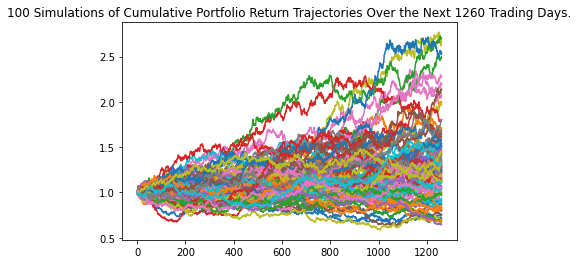

In [48]:
# Plot simulation outcomes
# YOUR CODE HERE!
simulation_plot_5= MC_5year.plot_simulation();

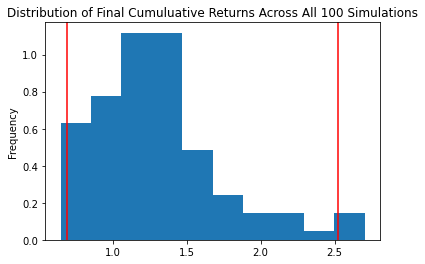

In [49]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
plot_dist_int_5 = MC_5year.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_5 = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count           100.000000
mean              1.304999
std               0.433825
min               0.647972
25%               1.032641
50%               1.251193
75%               1.463673
max               2.704833
95% CI Lower      0.689954
95% CI Upper      2.522618
Name: 1260, dtype: float64


In [51]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_5 = 20000 * 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_5 = round(tbl_5[8]*initial_investment_5,2)
ci_upper_5 = round(tbl_5[9]*initial_investment_5,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $20698.61 and $75678.54


### Ten Years Retirement Option

In [52]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252*10
)

In [53]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002084,1.002712,1.000717,1.013317,0.994993,0.987871,0.997563,0.989512,1.013232,1.010896,...,0.985631,0.999285,1.007619,1.000227,1.009225,1.007948,0.981287,0.998086,0.994829,0.991670
2,0.997787,0.994060,1.000453,1.017413,0.990599,0.995049,0.981575,0.998743,0.997306,1.020570,...,0.979824,1.003814,1.019030,1.010023,1.000986,1.002124,0.985244,1.006277,0.981075,0.989711
3,1.006976,0.981164,1.004032,1.026030,0.979288,0.987072,0.988035,1.007928,1.001161,1.016285,...,0.970847,1.005325,1.017485,1.014005,0.993820,1.002535,0.989557,1.019030,0.992611,0.990461
4,1.000697,0.975790,1.008961,1.023395,0.975441,0.986983,0.996305,1.004551,0.991959,1.021418,...,0.978844,1.014460,1.017781,1.012818,1.001536,1.010073,0.985075,1.027721,0.990341,0.994267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.028959,1.263260,3.046710,1.977986,1.052122,1.075380,2.241160,1.237368,3.658628,1.281759,...,2.069871,1.171405,0.888273,3.305277,1.972100,1.310139,1.803398,1.666992,1.655180,1.438094
2517,6.124338,1.270213,3.067893,1.970599,1.051843,1.060218,2.222774,1.242889,3.659655,1.300526,...,2.088859,1.169059,0.894899,3.311125,1.976729,1.294818,1.785187,1.638784,1.651829,1.426640
2518,6.134020,1.294061,3.093094,1.952477,1.067076,1.053623,2.200482,1.242658,3.684338,1.298794,...,2.122235,1.179253,0.898345,3.331609,1.971798,1.299207,1.762088,1.627869,1.666056,1.425399
2519,6.164206,1.295771,3.080961,1.943244,1.062152,1.052712,2.226809,1.244908,3.632039,1.296177,...,2.120917,1.161225,0.901610,3.353422,1.966780,1.300494,1.748484,1.632565,1.660411,1.421425


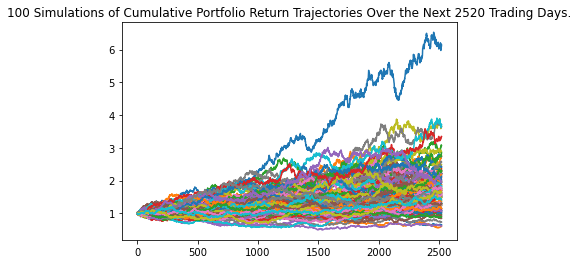

In [54]:
# Plot simulation outcomes
# YOUR CODE HERE!
simulation_plot_10= MC_10year.plot_simulation();

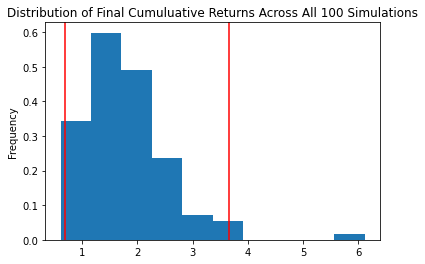

In [55]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
plot_dist_int_10 = MC_10year.plot_distribution();

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_10 = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl_10)

count           100.000000
mean              1.806751
std               0.787290
min               0.608536
25%               1.300375
50%               1.690295
75%               2.213680
max               6.118700
95% CI Lower      0.692050
95% CI Upper      3.650125
Name: 2520, dtype: float64


In [57]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_10 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_10 = round(tbl_10[8]*initial_investment_10,2)
ci_upper_10 = round(tbl_10[9]*initial_investment_10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $20761.49 and $109503.75
